Implement two classification machine learning algorithms Logistic Regression & Naive Bayes for the dataset 

You will have 9 marks to implement both. Also, Compare the performance of each Algorithm

Dataset: liver_disease_1.csv

The marks distribution is as follows

Import the libraries and Load the dataset and Remove/replace missing values (if any) [1 M]

Split features and labels [0.5 M]

Split train and test data [0.5 M}

Implement the Naïve Bayes classifier using Python

Implement Naïve Bayes Classifier [2 M]

Calculate accuracy measures [1 M]

Implement classification using Logistic Regression using Python

Implement Logistic regression Classifier [2 M]

Calculate accuracy measures [1 M]

Compare the results and accuracies for both the algorithms and share your inferences. [1M]

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import *

In [8]:
import warnings
warnings.filterwarnings('ignore')

In [15]:
df = pd.read_csv('liver_disease_1.csv')

In [16]:
df.head()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,0.7,0.1,187,16,18,6.8,3.3,0.90,Yes
1,62,10.9,5.5,699,64,100,7.5,3.2,0.74,Yes
2,62,7.3,4.1,490,60,68,7.0,3.3,0.89,Yes
3,58,1.0,0.4,182,14,20,6.8,3.4,1.00,Yes
4,72,3.9,2.0,195,27,59,7.3,2.4,0.40,Yes


In [17]:
from sklearn.preprocessing import MinMaxScaler
df.Dataset = df.Dataset.eq('Yes').mul(1)

# Rectifying Data

In [18]:
df.isnull().sum()

Age                           0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

In [19]:
df_drop = df[df.Albumin_and_Globulin_Ratio.notnull()]

In [20]:
df_drop.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000
mean,44.782383,3.315371,1.494128,291.366149,81.126079,110.414508,6.481693,3.138515,0.947064,0.715026
std,16.221786,6.227716,2.816499,243.561863,183.182845,289.850034,1.084641,0.794435,0.319592,0.451792
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,0.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,0.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,61.000000,87.000000,7.200000,3.800000,1.100000,1.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,1.000000


In [21]:
df_drop.reset_index(inplace = True, drop= True)

In [22]:
df_drop.columns

Index(['Age', 'Total_Bilirubin', 'Direct_Bilirubin', 'Alkaline_Phosphotase',
       'Alamine_Aminotransferase', 'Aspartate_Aminotransferase',
       'Total_Protiens', 'Albumin', 'Albumin_and_Globulin_Ratio', 'Dataset'],
      dtype='object')

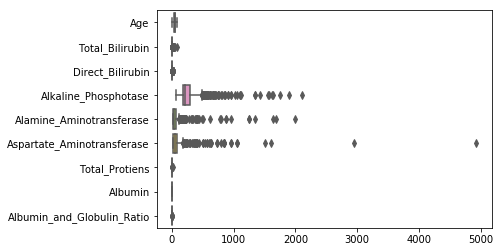

In [23]:
sns.boxplot( data = df_drop[['Age', 'Total_Bilirubin', 'Direct_Bilirubin', 'Alkaline_Phosphotase',
       'Alamine_Aminotransferase', 'Aspartate_Aminotransferase',
       'Total_Protiens', 'Albumin', 'Albumin_and_Globulin_Ratio' ]],orient ='h',palette = 'Set2')
plt.show()

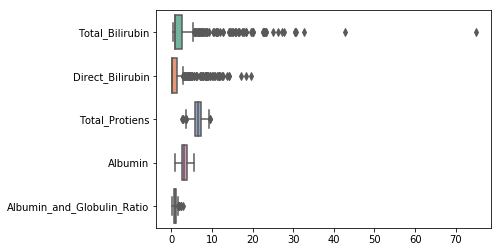

In [24]:
sns.boxplot( data = df_drop[['Total_Bilirubin', 'Direct_Bilirubin',
       'Total_Protiens', 'Albumin', 'Albumin_and_Globulin_Ratio' ]],orient ='h',palette = 'Set2')
plt.show()

Alkaline_Phosphotase, Alamine_Aminotransferase', 'Aspartate_Aminotransferase', 'Total_Bilirubin', 'Direct_Bilirubin', have outliers

# Z Socre for outliers

A Z-score is a numerical measurement that describes a value's relationship to the mean of a group of values. Z-score is measured in terms of standard deviations from the mean. If a Z-score is 0, it indicates that the data point's score is identical to the mean score

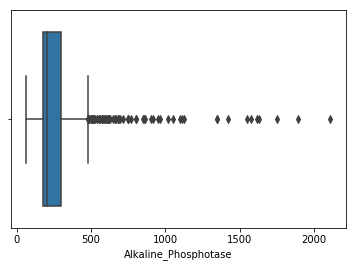

In [25]:
sns.boxplot(df_drop.Alkaline_Phosphotase)
plt.show()

In [26]:
z = np.abs(stats.zscore(df_drop.Alkaline_Phosphotase))
threshold = 3
print(np.where(z > threshold))

(array([ 77, 115, 116, 128, 135, 161, 195, 199, 232, 415, 416, 425, 443, 448], dtype=int64),)


In [27]:
feature = 'Alkaline_Phosphotase'

In [28]:
def replace_outliers(df_drop,feature):
    maximum_outlier = df_drop[feature].mean() + 3*df_drop[feature].std() 
    print('maximum_outlier- ' , maximum_outlier)
    mean = df_drop.loc[df_drop[feature]<maximum_outlier, feature].mean()
    df_drop[feature] = np.where(df_drop[feature] >maximum_outlier , mean,df_drop[feature])
    return df_drop
    

In [29]:
df_drop =replace_outliers(df_drop,feature)

maximum_outlier-  1022.0517385555727


In [30]:
z = np.abs(stats.zscore(df_drop.Alamine_Aminotransferase))
threshold = 3
print(np.where(z > threshold))

(array([ 25,  26,  27,  47, 117, 118, 119, 135, 199, 207, 475], dtype=int64),)


In [31]:
feature = 'Alamine_Aminotransferase'
df_drop =replace_outliers(df_drop,feature)

maximum_outlier-  630.6746141395361


In [32]:
feature = 'Aspartate_Aminotransferase'
df_drop =replace_outliers(df_drop,feature)

maximum_outlier-  979.9646108542199


In [33]:
z = np.abs(stats.zscore(df_drop.Direct_Bilirubin))
threshold = 3
print(np.where(z > threshold))

(array([120, 121, 168, 199, 256, 308, 366, 443, 499, 500, 501, 505, 515,
       527, 542, 543, 555, 561, 571], dtype=int64),)


In [34]:
feature = 'Direct_Bilirubin'
df_drop =replace_outliers(df_drop,feature)

maximum_outlier-  9.943623636292195


In [35]:
feature = 'Total_Bilirubin'
df_drop =replace_outliers(df_drop,feature)

maximum_outlier-  21.998520610788034


In [36]:
df_drop.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000
mean,44.782383,2.510854,1.104464,262.054867,59.054577,88.752182,6.481693,3.138515,0.947064,0.715026
std,16.221786,3.583822,1.794541,149.294763,73.630957,138.678194,1.084641,0.794435,0.319592,0.451792
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,0.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,0.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.510854,1.104464,290.000000,59.054577,87.000000,7.200000,3.800000,1.100000,1.000000
max,90.000000,20.200000,9.500000,1020.000000,622.000000,960.000000,9.600000,5.500000,2.800000,1.000000


# Multivariate Analysis 

In [37]:
df_o = df_drop.reset_index( drop= True)

In [38]:
color = ['red','blue']
sns.pairplot(df_o, hue = 'Dataset' , palette = sns.xkcd_palette(color) )

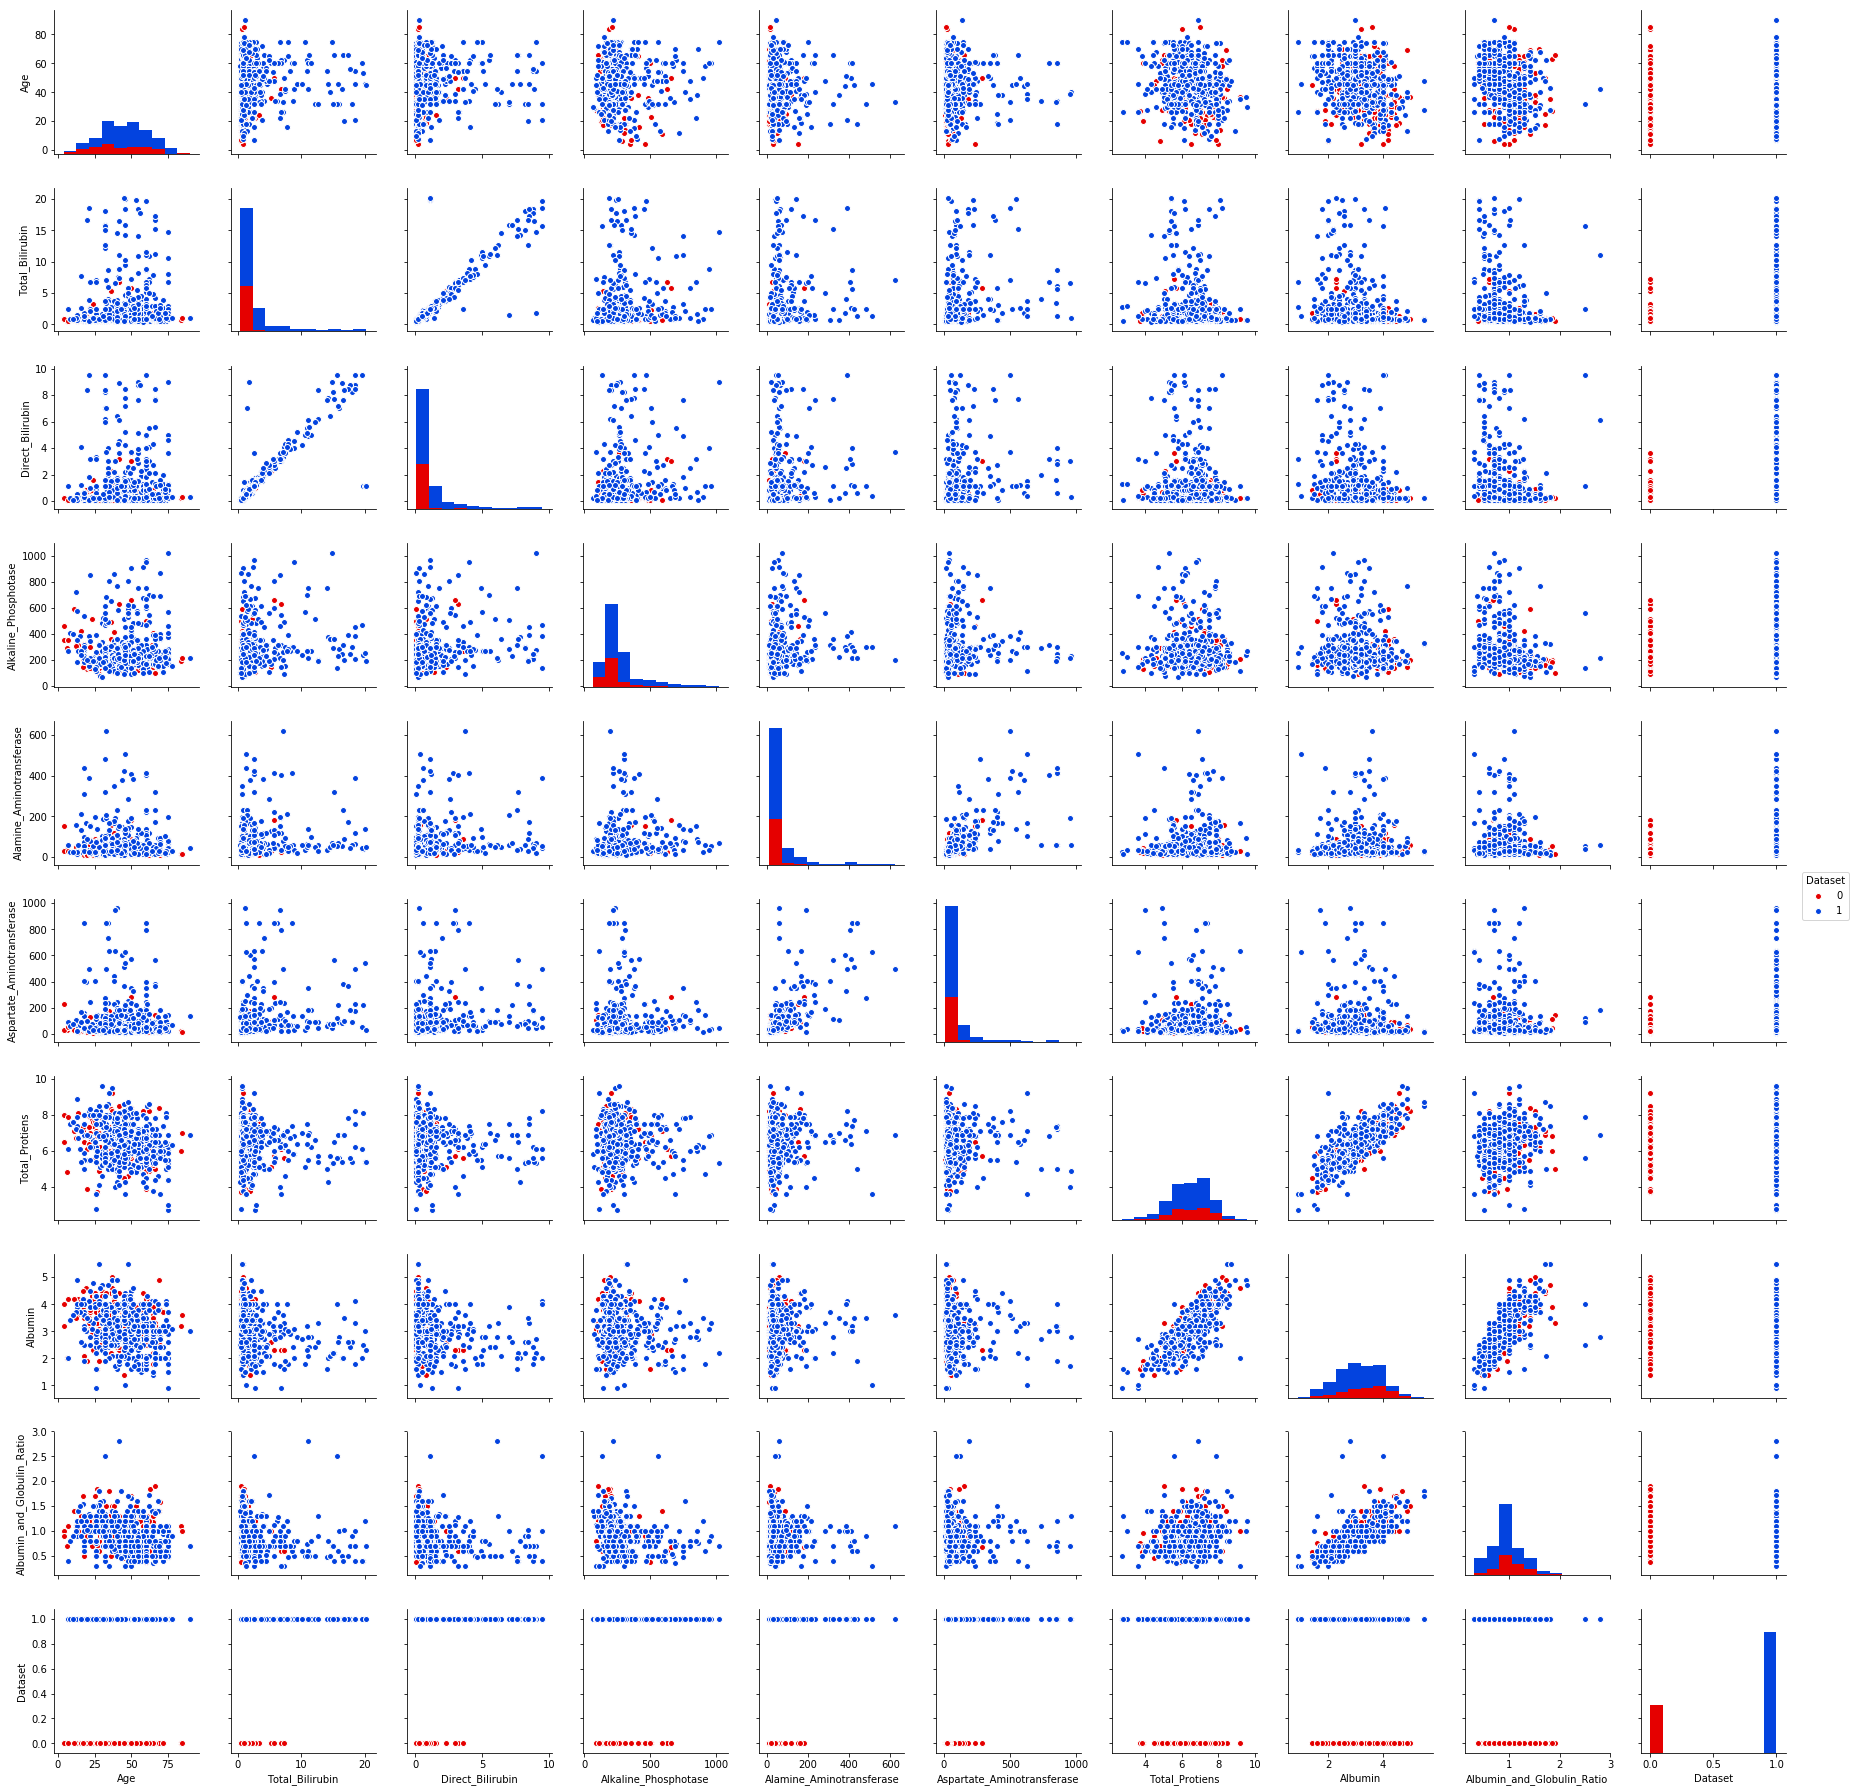

In [39]:
plt.show()

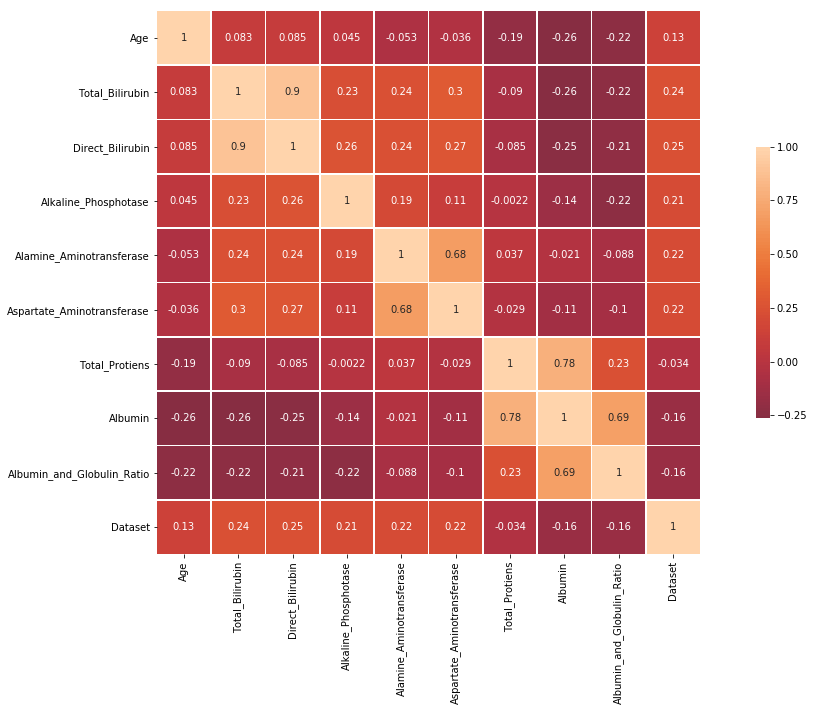

In [40]:
f, ax = plt.subplots(figsize=(20, 10))
# cmap = sns.diverging_palette(20, 200, as_cmap=True)
sns.heatmap(df_o.corr(), annot=True, center=-1,
square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

'Total_Bilirubin' and 'Direct_Bilirubin' are higly correlated , we can drop one feathure.  Similarly Alamine_Aminotransferase' & 'Aspartate_Aminotransferase' and 'Albumin'& 'Albumin_and_Globulin_Ratio' are also correlated. Lets drop 'Total_Bilirubin' and 'Aspartate_Aminotransferase' as their correlation with Dataset is lower and also drop Albumin as 'Albumin_and_Globulin_Ratio' ratio captures more information. Total_Protiens has very low correlation


# Preparing the Data

In [41]:
df_o.columns

Index(['Age', 'Total_Bilirubin', 'Direct_Bilirubin', 'Alkaline_Phosphotase',
       'Alamine_Aminotransferase', 'Aspartate_Aminotransferase',
       'Total_Protiens', 'Albumin', 'Albumin_and_Globulin_Ratio', 'Dataset'],
      dtype='object')

In [42]:
features = ['Age',  'Direct_Bilirubin', 'Alkaline_Phosphotase',
       'Alamine_Aminotransferase', 
      'Albumin_and_Globulin_Ratio']

In [43]:
X = df_o[ features]
y = df_o['Dataset']

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0 )

In [45]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Modelling

# Logistic Regression

In [46]:
model = LogisticRegression()

In [47]:
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [48]:
y_pred = model.predict(X_test)

In [49]:
accuracy_score(y_test, y_pred)

0.72413793103448276

In [50]:
accuracy_score(y_test, y_pred)

0.72413793103448276

The accuracy is not very good

In [51]:
pd.crosstab(y_test, y_pred, rownames =['True'], colnames = ['Predicted'], margins = True)

Predicted,0,1,All
True,,,
0,6,35,41
1,5,99,104
All,11,134,145


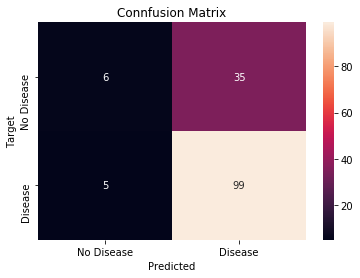

In [52]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True, xticklabels = ['No Disease','Disease'], yticklabels = ['No Disease', 'Disease'])
plt.xlabel('Predicted')
plt.ylabel('Target')
plt.title('Connfusion Matrix')
plt.show()

We can see 35+ 5 = 40 tragets were missclassified . False Positives are high =35

In [53]:
print(classification_report(y_test,y_pred))

             precision    recall  f1-score   support

          0       0.55      0.15      0.23        41
          1       0.74      0.95      0.83       104

avg / total       0.68      0.72      0.66       145



Recall = True Positive /(True Positive + False Negative). Recall is good in this case, so atleast we didnt miss many patients with liver disease.
Precision = True Positive /(True Positive + False Positive) . But Precision is low , that means many people will be diagonised as having disease but when in fact they are normal

# Naive Bayes Classifier

Out of Multinomial, Bernoulli and Gaussian - Bernoulli is most suited for this as it is boolean type classificaiton

In [54]:
from sklearn.naive_bayes import BernoulliNB

In [55]:
BM= BernoulliNB()

In [56]:
BM.fit(X_train,y_train)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [57]:
y_pred = BM.predict(X_test)

In [58]:
accuracy_score(y_test, y_pred)

0.66206896551724137

In [59]:
pd.crosstab(y_test, y_pred, rownames =['True'], colnames = ['Predicted'], margins = True)

Predicted,0,1,All
True,,,
0,16,25,41
1,24,80,104
All,40,105,145


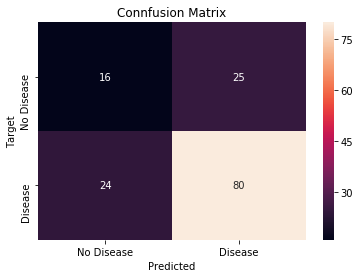

In [60]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True, xticklabels = ['No Disease','Disease'], yticklabels = ['No Disease', 'Disease'])
plt.xlabel('Predicted')
plt.ylabel('Target')
plt.title('Connfusion Matrix')
plt.show()

The accuracy is not very good. Both False Positive (24) and False Negative (25) are high

In [61]:
print(classification_report(y_test,y_pred))

             precision    recall  f1-score   support

          0       0.40      0.39      0.40        41
          1       0.76      0.77      0.77       104

avg / total       0.66      0.66      0.66       145



Logistic Regression Model is better than Naive Bayes Classifier in this case. Both precision and recall is higher for logistic regression 